In [248]:
import os
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [249]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /private/var/folders/5c/5hwthp3s4j78hq0ck0rq31lw0000gp/T/pip-req-build-grjjgiqc
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /private/var/folders/5c/5hwthp3s4j78hq0ck0rq31lw0000gp/T/pip-req-build-grjjgiqc
  Resolved https://github.com/tensorflow/docs to commit 9287030cdd90c6df4dc1efebc932c57188dea873
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [250]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

In [251]:
all_ds = pd.read_csv('BostonHousing.csv')

In [252]:
all_ds.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [253]:
all_ds.shape

(506, 14)

In [254]:
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Split the data

In [255]:
train_dataset, temp_test_dataset =  train_test_split(all_ds_90pct, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(273, 14)
(182, 14)


In [256]:
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(91, 14)
(91, 14)


In [259]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("medv")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
crim,273.0,3.461614,7.681002,0.01096,0.07013,0.21409,3.69695,73.5341
zn,273.0,12.384615,24.674060,0.00000,0.00000,0.00000,12.50000,95.0000
indus,273.0,10.815348,6.983143,1.21000,4.93000,8.14000,18.10000,27.7400
chas,273.0,0.047619,0.213350,0.00000,0.00000,0.00000,0.00000,1.0000
nox,273.0,0.548322,0.112314,0.38900,0.44900,0.52400,0.61400,0.8710
rm,273.0,6.308311,0.686230,3.56100,5.92600,6.22300,6.63500,8.7250
age,273.0,68.005861,27.502358,6.20000,45.70000,76.50000,93.40000,100.0000
dis,273.0,3.877114,2.137474,1.13700,2.10990,3.27970,5.28730,12.1265
rad,273.0,9.688645,8.867185,1.00000,4.00000,5.00000,24.00000,24.0000
tax,273.0,407.706960,174.445640,187.00000,277.00000,315.00000,666.00000,711.0000


In [260]:
train_labels = train_dataset.pop('medv')
test_labels = test_dataset.pop('medv')
valid_labels = valid_dataset.pop('medv')

In [263]:
# make a function to normalize the values of dataset.
def normalize(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)
normed_valid_dataset = normalize(valid_dataset)


In [264]:
normed_train_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
436,1.426791,-0.501929,1.043177,-0.223197,1.706633,0.222504,0.919708,-0.876976,1.613968,1.480651,0.809984,-3.840334,0.846097
352,-0.441241,1.929775,-1.306768,-0.223197,-1.222661,-0.618322,-1.800059,3.196851,-0.641539,0.018877,-0.097443,0.364500,-0.640909
65,-0.446006,2.740343,-1.066189,-0.223197,-1.338408,-0.026684,-1.825511,1.279260,-0.641539,-0.405324,-1.148147,0.417170,-1.093098
71,-0.430003,-0.501929,-0.000766,-0.223197,-1.204853,-0.506115,-1.836419,0.659744,-0.641539,-0.588762,0.332391,0.187128,-0.338000
25,-0.341241,-0.501929,-0.383115,-0.223197,-0.091900,-1.033635,0.643368,0.270172,-0.641539,-0.577297,1.192058,-0.660201,0.622901


# Build a Neural Network Model 

In [265]:
def build_model():
    model = Sequential([
        Dense(32, input_shape = (normed_train_data.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        Dense(600,Activation('selu')),
        tf.keras.layers.BatchNormalization(),
        Dense(350, Activation('selu')),
        tf.keras.layers.BatchNormalization(),
        Dense(200, Activation('selu')),
        tf.keras.layers.BatchNormalization(),
        Dense(150, Activation('selu')),
        tf.keras.layers.BatchNormalization(),
        Dense(64, Activation('selu')),
        Dense(1) 
        
    ])

    model.compile(loss='mse',optimizer='adam', metrics=['mae', 'mse', 'mape'])
    return model

model = build_model()
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 32)                448       
                                                                 
 batch_normalization_44 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_176 (Dense)           (None, 600)               19800     
                                                                 
 batch_normalization_45 (Bat  (None, 600)              2400      
 chNormalization)                                                
                                                                 
 dense_177 (Dense)           (None, 350)               210350    
                                                                 
 batch_normalization_46 (Bat  (None, 350)            

In [266]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 108ms/step


array([[-3.105781  ],
       [ 1.5017387 ],
       [ 1.5819788 ],
       [ 1.7133957 ],
       [-0.38341695],
       [-0.2440471 ],
       [ 1.2982724 ],
       [-1.0524561 ],
       [ 1.0706601 ],
       [-1.9483969 ]], dtype=float32)

# Train the model

In [267]:
%%time
EPOCHS = 500
batch_size = 32 # 6 iteration

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11.9 µs


In [268]:
history = model.fit(normed_train_data, train_labels, batch_size = 32, epochs=700,shuffle=True,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],)



Epoch 1/700
1/9 [==>...........................] - ETA: 6s - loss: 619.9632 - mae: 23.6942 - mse: 619.9632 - mape: 101.5210
Epoch: 0, loss:457.0545,  mae:20.5226,  mape:98.3506,  mse:457.0545,  val_loss:281.3425,  val_mae:15.5224,  val_mape:88.3605,  val_mse:281.3425,  
9/9 [==============================] - 1s 26ms/step - loss: 457.0545 - mae: 20.5226 - mse: 457.0545 - mape: 98.3506 - val_loss: 281.3425 - val_mae: 15.5224 - val_mse: 281.3425 - val_mape: 88.3605
Epoch 2/700
9/9 [==============================] - 0s 7ms/step - loss: 320.2461 - mae: 17.1741 - mse: 320.2461 - mape: 83.4296 - val_loss: 123.8091 - val_mae: 9.2386 - val_mse: 123.8091 - val_mape: 51.5668
Epoch 3/700
9/9 [==============================] - 0s 6ms/step - loss: 238.8135 - mae: 14.5282 - mse: 238.8135 - mape: 70.2086 - val_loss: 62.8917 - val_mae: 6.2721 - val_mse: 62.8917 - val_mape: 32.5552
Epoch 4/700
9/9 [==============================] - 0s 7ms/step - loss: 165.4207 - mae: 11.8717 - mse: 165.4207 - mape: 56.7

In [269]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
695,1.654269,0.978299,1.654269,4.705446,8.064301,2.055024,8.064301,11.846622,695
696,1.799136,0.990854,1.799136,5.019693,9.116484,2.049233,9.116484,11.011073,696
697,2.386119,1.106151,2.386119,5.562090,9.150053,2.132650,9.150053,11.527813,697
698,1.664734,1.011297,1.664734,4.967432,8.383777,2.148311,8.383777,12.267690,698
699,1.549462,0.951210,1.549462,4.959867,8.055009,1.995373,8.055009,10.086403,699


# Test the model


In [270]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)

example_result

1/1 [==============================] - 0s 26ms/step


array([[41.99715 ],
       [10.220896],
       [19.850353],
       [25.078897],
       [18.90607 ],
       [28.611526],
       [29.173958],
       [36.84776 ],
       [22.511316],
       [14.109384]], dtype=float32)

In [271]:
test_labels[:10]

228    46.7
425     8.3
207    22.5
302    26.4
14     18.2
41     26.6
229    31.5
160    27.0
288    22.3
466    19.0
Name: medv, dtype: float64

# Plotting the loss/mse across epochs


Text(0, 0.5, 'MSE [medv^2]')

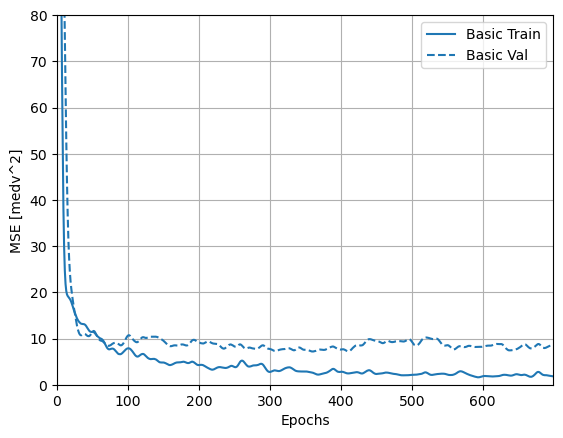

In [272]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 80])
plt.ylabel('MSE [medv^2]')

3/3 [==============================] - 0s 2ms/step


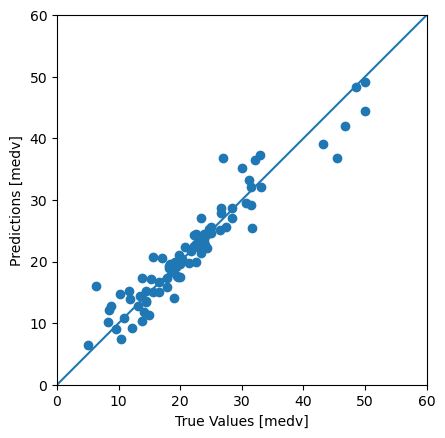

In [273]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)